In [40]:
# there are two ways by which we can impute missing categorical data.
#most frequent imputation, and missing category imputation

In [41]:
#method1- most frequent category-pros: simple and fast, cons:when data is imbalance it show bias, best for: When missingness is random and the column has a dominant category

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [43]:
df=pd.read_csv("train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head(8)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
5,NaN,TA,143000
6,Gd,TA,307000
7,TA,TA,200000


In [44]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [45]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='FireplaceQu'>

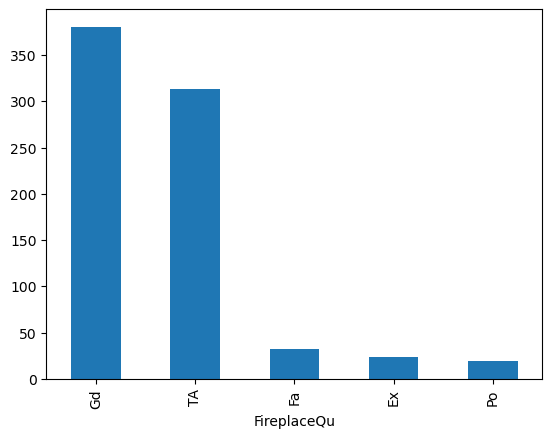

In [46]:
df["FireplaceQu"].value_counts().plot(kind='bar')

<Axes: xlabel='GarageQual'>

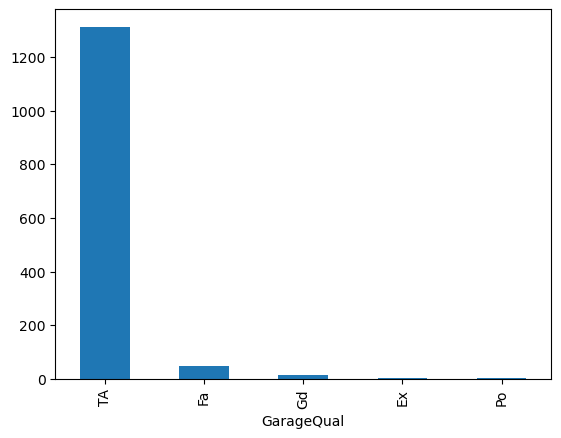

In [47]:
df["GarageQual"].value_counts().plot(kind='bar')

In [48]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

In [49]:
#most frequent value or mode in the data is TA

Text(0.5, 1.0, 'GarageQuality')

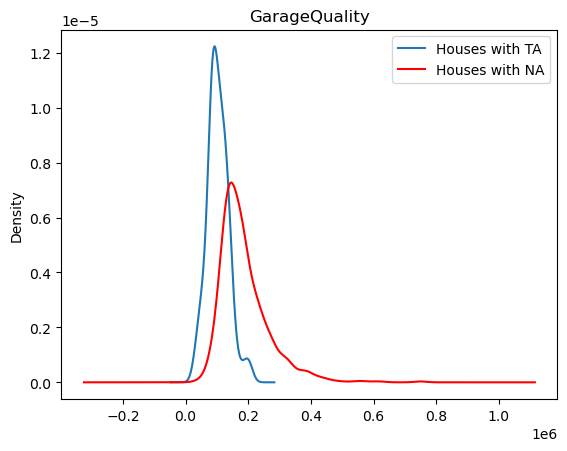

In [50]:
#houses with TA and Houses with Nan
#pdf- probavility density function for houses with TA and Nan
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax)

df[df["GarageQual"]=='TA']['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQuality')

In [51]:
#houses with TA are more than houses with Nan

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15588\5552490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

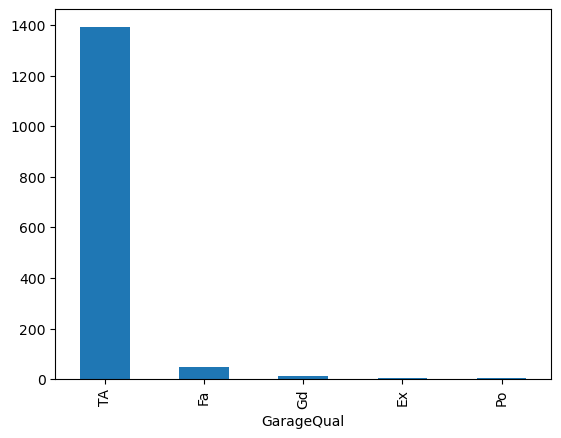

In [52]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

In [53]:
#after filling houses with TA inplace of Nan, TA increased gradually.

Text(0.5, 1.0, 'GarageQuality')

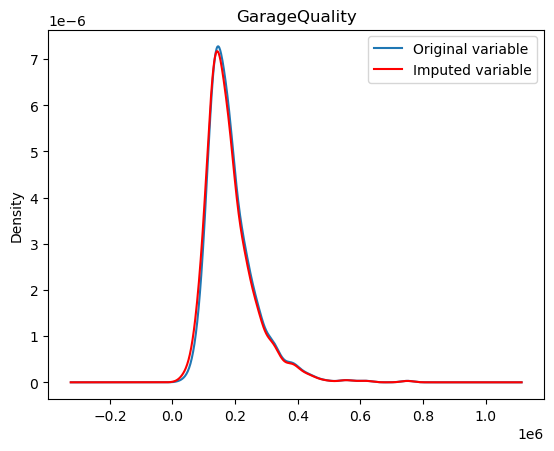

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('GarageQuality')

In [55]:
#missing values are around 5% which did not change the distribution

<Axes: xlabel='FireplaceQu'>

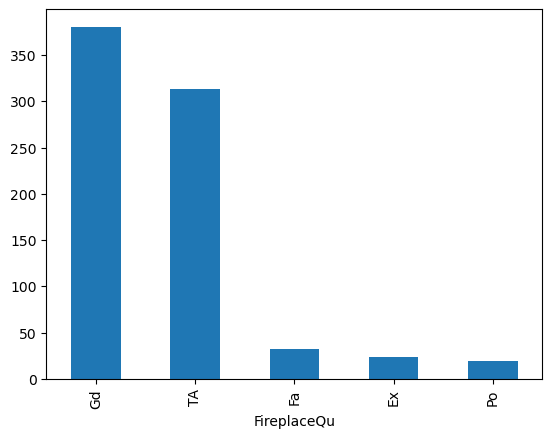

In [56]:
#frequent value distribution of Fireplacequality where two categories are most frequent
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQuality')

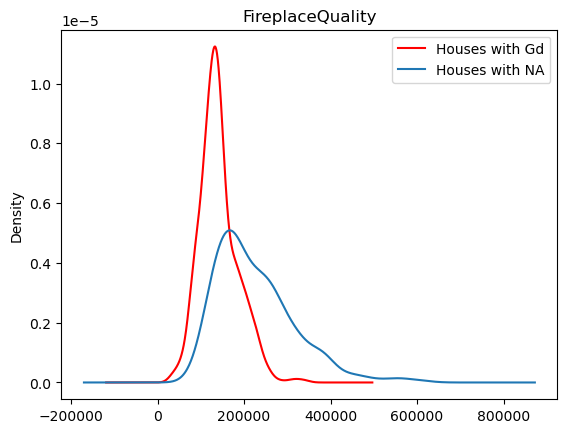

In [58]:

fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

df[df["FireplaceQu"]=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQuality')

In [59]:
temp=df[df["FireplaceQu"]=='Gd']['SalePrice']

In [60]:
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15588\3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

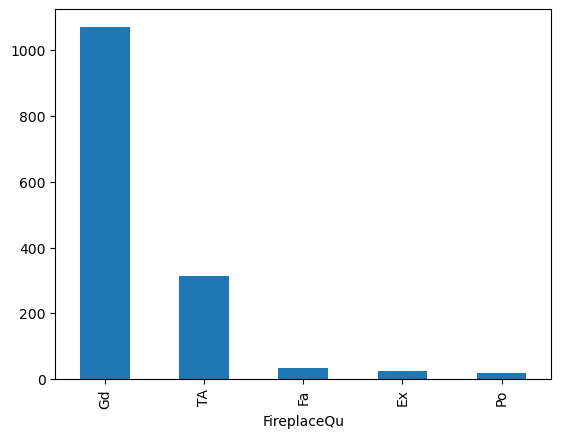

In [61]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

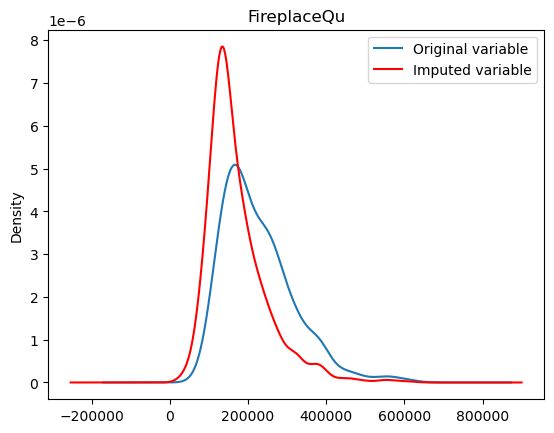

In [62]:

fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [66]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.3)

In [67]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='most_frequent')

In [68]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_train)

C:\Users\THINKPAD\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [69]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### missing values imputer

<Axes: xlabel='GarageQual'>

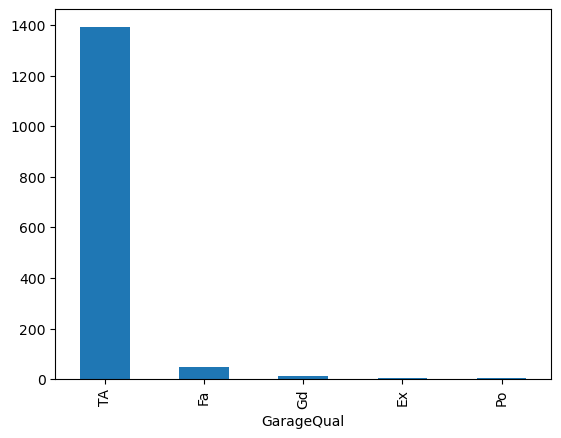

In [70]:
df["GarageQual"].value_counts().plot(kind='bar')

In [84]:
df['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

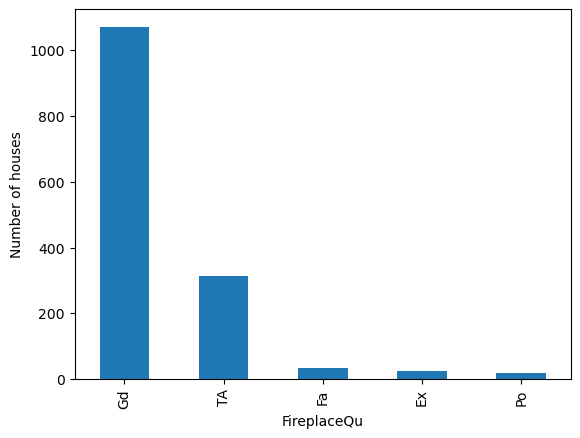

In [85]:

df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [86]:
df

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,Gd,TA,142125


In [87]:
df['FireplaceQu'].unique()

array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object)

In [88]:
df['FireplaceQu'].isna().sum()

0